En esta tarea trabajará con redes neuronales, más específicamente con redes convolucionales (CNNs). El objetivo será usar este tipo de redes para la tarea de clasificación. Usted contará con un dataset, con sus etiquetas respectivas1, las cuales corresponden a lagos, residenciales, vegetación herbácea, bosques y cultivos, cada una de tamaño 64x64. En base a estas imágenes se pide:

1. Organizar las imágenes en conjuntos disjuntos de entrenamiento, validación y prueba. Luego diseñe y construya una arquitectura de CNN adecuada para las imágenes, usando para ello capas convolucionales, capas de pooling y FCL (Fully Connected Layer). Deberá justificar los hiperparámetros utilizados: número de capas, filtros por bloque, kernel size, learning rate, batch size, epochs. Recuerde que el ajuste de hiperparámetros es solo con el conjunto de validación.

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt

2025-12-01 17:12:36.264818: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


    1. Cargar y dividir el dataset

    Se divide el dataset en 3 grupos.
    Train para entrenamiento. (80%)
    Val para validación. (20%)
    Test para testing y comparacion de modelos al final. (1500 imagenes separadas inicialmente)

In [2]:
data_dir = "dataset"
img_size = (64, 64)

img_size = (64, 64)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2     # 20% para validación
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset="training",
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset="validation",
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_gen = test_datagen.flow_from_directory(
    "dataset_test",
    target_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

Found 10800 images belonging to 5 classes.
Found 2700 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.


    2. Definir una CNN

    Justificacion de parametros:
        Se utilizaron 3 bloques convolucionales, cada uno con filtros de mayor tamaño, esto permite capturar patrones simples en las primeras capas, y patrones mas complejos en las ultimas.
        Se utilizaron 32, 64 y 128 filtros, siguiendo el patron estandar de duplicar la cantidad por cada operacion de pooling.
        Se utilizo ReLU para limitar el coste computacional, reduciendo neuronas innecesarias, ademas de funcionar como un estabilizador para el entrenamiento.
        Se utilizaron 25 epocas, este valor se obtuvo por tanteo, dado a que con 10, las curvas aun seguian mejorando, por lo que se necesitaba extender el proceso, y luego con 50, se podia observar el sobreajuste mucho antes de que se terminara el proceso, por lo que era innecesariamente largo, finalizando con 25.
        Se utilizo un learning rate de 0.001 (Adam), dado a que es un valor estandar en tareas de clasificacion CNN, valores mayores pueden crear inestabilidad, y valores menores pueden causar una demora en la convergencia.

In [3]:
model = models.Sequential([

    layers.Input(shape=(64,64,3)),
    
    # Bloque 1
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    # Bloque 2
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    # Bloque 3 
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])

    3. Compilación del modelo
        Se utilizo un learning rate de 0.001 (Adam), dado a que es un valor estandar en tareas de clasificacion CNN, valores mayores pueden crear inestabilidad, y valores menores pueden causar una demora en la convergencia.
        Se utilizo accuracy como metrica para medir el aprendizaje, esto es estandar en modelos basicos de clasificacion CNN.

In [4]:
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate=learning_rate)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,142,597 (4.36 MB)

 Trainable params: 1,142,597 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

    4. Entrenamiento

        Se utilizaron 25 epocas, este valor se obtuvo por tanteo, dado a que con 10, las curvas aun seguian mejorando, por lo que se necesitaba extender el proceso, y luego con 50, se podia observar el sobreajuste mucho antes de que se terminara el proceso, por lo que era innecesariamente largo, finalizando con 25.

In [5]:
epochs = 25  # ajustable (originalmente 10, testeado con 50, finalmente, se utilizan 25.

history = model.fit(
    train_gen,
    epochs=epochs,
    validation_data=val_gen
)

Epoch 1/25
338/338 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.7290 - loss: 0.6626 - val_accuracy: 0.8404 - val_loss: 0.4156
Epoch 2/25
338/338 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.8619 - loss: 0.3637 - val_accuracy: 0.8752 - val_loss: 0.3544
Epoch 3/25
338/338 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.8932 - loss: 0.2945 - val_accuracy: 0.8944 - val_loss: 0.3018
Epoch 4/25
338/338 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.9140 - loss: 0.2371 - val_accuracy: 0.9378 - val_loss: 0.2021
Epoch 5/25
338/338 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.9285 - loss: 0.2038 - val_accuracy: 0.9322 - val_loss: 0.1935
Epoch 6/25
338/338 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.9328 - loss: 0.1846 - val_accuracy: 0.8574 - val_loss: 0.3833
Epoch 7/25
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9456 - loss: 0.1533 - val_accuracy: 0.9396 - val_loss: 0.1850
Epoch 8/25
338/338 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.9506 - loss: 0.1383 - 

2. Luego, investigue qué es dropout, explique brevemente cómo ayuda a reducir el sobreajuste y añádalo a su arquitectura en capas apropiadas, justificando la(s) tasa(s) seleccionada(s) y su ubicación.

    1. Explicacion dropout:
        Dropout es una técnica de regularización que consiste en desactivar aleatoriamente un porcentaje de neuronas durante el entrenamiento.
        En cada batch, algunas neuronas dejan de participar (se “apagan”), lo que obliga a la red a no depender de conexiones específicas.
        
        Cómo reduce el sobreajuste:
            Evita que el modelo memorize patrones específicos del conjunto de entrenamiento.
            Fuerza a distintas partes de la red a aprender representaciones más robustas.
            El resultado es un modelo con mejor capacidad de generalización y menor diferencia entre accuracy de entrenamiento y validación.

3. Compare el desempeño de la arquitectura base frente a la arquitectura con dropout. Para la comparación seleccione al menos dos métricas (justifique su elección) que permitan una evaluación informativa, utilizando el conjunto de prueba. Además, incluya las curvas de entrenamiento y validación, de loss y accuracy por época. Presente ambas métricas con sus dos series (entrenamiento y validación) e interprete brevemente lo observado.

    1. Definir modelo con dropout
    
        Se utilizo un Dropout igual a 0.3 en la capa fully connected, antes de la capa softmax, ya que estas capas son mas densas, teniendo mayor cantidad de parametros, que suelen tener mayor sobreajuste, de esta forma se puede apreciar de mejor manera la diferencia entre poseer y no poseer dropout.

In [9]:
#tf.config.run_functions_eagerly(True)

model_dropout = models.Sequential([
    layers.Input(shape=(64,64,3)),
    
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')
])

    2. Compilar modelo con dropout

In [10]:
optimizer_dropout = optimizers.Adam(learning_rate=learning_rate)

model_dropout.compile(
    optimizer=optimizer_dropout,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_dropout.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,142,597 (4.36 MB)

 Trainable params: 1,142,597 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

    3. Entrenar modelo con dropout

In [11]:
history_dropout = model_dropout.fit(
    train_gen,
    epochs=epochs,
    validation_data=val_gen
)

Epoch 1/25
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.6873 - loss: 0.7327 - val_accuracy: 0.7737 - val_loss: 0.5592
Epoch 2/25
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.8429 - loss: 0.4253 - val_accuracy: 0.9107 - val_loss: 0.2703
Epoch 3/25
338/338 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.8826 - loss: 0.3350 - val_accuracy: 0.8433 - val_loss: 0.4204
Epoch 4/25
338/338 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.9019 - loss: 0.2834 - val_accuracy: 0.9063 - val_loss: 0.2488
Epoch 5/25
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9125 - loss: 0.2503 - val_accuracy: 0.8726 - val_loss: 0.3037
Epoch 6/25
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9175 - loss: 0.2413 - val_accuracy: 0.9530 - val_loss: 0.1526
Epoch 7/25
338/338 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.9272 - loss: 0.2103 - val_accuracy: 0.9474 - val_loss: 0.1605
Epoch 8/25
338/338 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.9339 - loss: 0.1920 - 

    4. Test
    
        Se utiliza el set de testing separado inicialmente para evaluar ambos modelos y comparar su rendimiento con y sin dropout.

In [12]:
test_base = model.evaluate(test_gen, verbose=0)
test_dropout = model_dropout.evaluate(test_gen, verbose=0)

print("Base - Test Loss:", test_base[0], "Test Accuracy:", test_base[1])
print("Dropout - Test Loss:", test_dropout[0], "Test Accuracy:", test_dropout[1])

Base - Test Loss: 0.17120878398418427 Test Accuracy: 0.9506666660308838
Dropout - Test Loss: 0.13295961916446686 Test Accuracy: 0.9606666564941406


    5. Graficos de curvas (Loss)

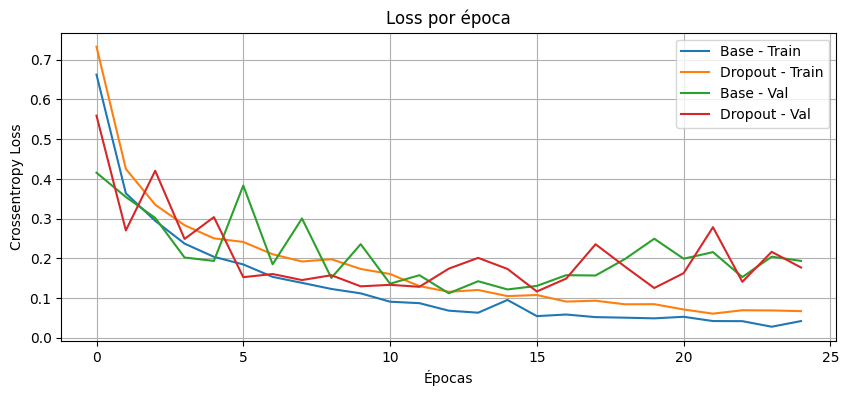

In [13]:
plt.figure(figsize=(10,4))

plt.plot(history.history['loss'], label='Base - Train')
plt.plot(history_dropout.history['loss'], label='Dropout - Train')

plt.plot(history.history['val_loss'], label='Base - Val')
plt.plot(history_dropout.history['val_loss'], label='Dropout - Val')

plt.title("Loss por época")
plt.xlabel("Épocas")
plt.ylabel("Crossentropy Loss")
plt.legend()
plt.grid(True)
plt.show()

    6. Graficos de curvas (Accuracy)

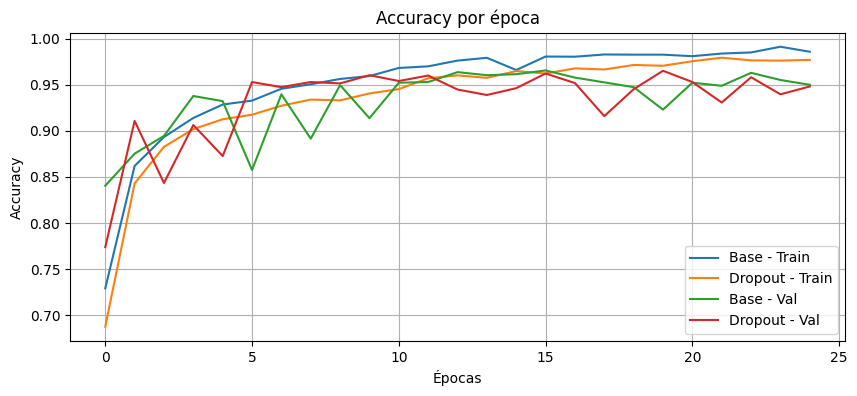

In [14]:
plt.figure(figsize=(10,4))

plt.plot(history.history['accuracy'], label='Base - Train')
plt.plot(history_dropout.history['accuracy'], label='Dropout - Train')

plt.plot(history.history['val_accuracy'], label='Base - Val')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout - Val')

plt.title("Accuracy por época")
plt.xlabel("Épocas")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

    Analisis:
        Se utilizaron metricas Loss y Accuracy tanto para entrenamiento (train) y validacion (val) y se compararon con y sin dropout.
        Estas metricas permiten analizar la capacidad de aprendizaje (train loss / train acc) y de generalizacion (val loss / val acc), juntoo a la aparicion del sobreajuste, estos modelos fueron evaluados con el conjunto de prueba, que ninguno de los modelos tuvo acceso durante todo su entrenamiento.
        Observando las curvas de loss y accuracy, se observa como el modelo base, comienza a mostrar claros ejemplos de sobreajuste, inicialmente en la epoca 5, donde su curva de entrenamiento sigue bajando, mientras que la de validacion toma una subida repentina, y esto es claramente atribuible al sobreajuste.
        El modelo con dropout tambien muestra este comportamiento, pero se mantiene mas estable hasta llegar a la epoca 13, donde se observa su primer gran pico de loss, dado al sobre ajuste.

        Adicionalmente, al comparar los resultados de testing, se observa que el modelo con dropout tiene un desempeño superior con el conjunto de prueba, superandolo por un 1% en accuracy (96.07% vs 95.07%), la cual es una mejora leve, pero notable.
        Ademas, el modelo con dropout tiene una perdida de 3.82% menor (13.30% vs 17.12%), siendo una mejora del 22.31%, lo que muestra una clasificaciion mas segura y estable.

    Conclusion:
        La arquitectura base CNN logro un desempeño estable en la tarea de clasificacion, mostrando signos de sobreajuste a partir de la epoca 5, y luego mostrandose claramente desde la epoca 16 en adelante, en cambio el modelo con dropout evito los problemas del sobreajuste hasta la epoca 14, para luego continuar con los mismos problemas de sobreajuste desde la epoca 17 al igual que el modelo original.
        Esto evidencia como el dropout estabiliza la generalizacion, sobre todo durante las epocas intermedias y tardias, retrasando los efectos de esta, mostrandose como un recurso funcional para mejorar la estabilidad y robustez para el modelo utilizado.

Es necesario mencionar (por pauta), que el codigo utilizado fue inicialmente generado con chat GPT, y luego depurado manualmente, todo el proceso de analisis fue hecho a mano.